# **Proyek Pertama : Membuat Model NLP dengan TensorFlow**
### Nama : Thariq Iskandar Zulkarnain M P
### No. Pendaftaran : 0182180151-57
### Email : thariqiskandar9@gmail.com
### No. Handphone : 6281332409623
### Tema Pelatihan : FGA Machine Learning (IBM)

In [1]:
#membuat kelas callback
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi training set dan validation set telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [2]:
#input data bbc text yang telah didownload dari kaggle
import pandas as pd
df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
#melakukan proses one-hot encoding pada kolom category
new_category = pd.get_dummies(df.category)
new_df = pd.concat([df, new_category], axis=1)
new_df = new_df.drop(columns='category')
new_df

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [4]:
#mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
text = new_df['text'].values
label = new_df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [5]:
#bagi data training dan data testing dengan ratio 80:20
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#mengubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)

#konversi setiap sampel menjadi sequence
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

#menggunakan fungsi pad_sequences agar setiap sequence sama panjang
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [7]:
import tensorflow as tf

#membangun arsitektur neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  #dataset terdiri dari 5 kelas
])

#memanggil fungsi compile
model.compile(loss='categorical_crossentropy',  #dataset terdiri dari 5 kelas
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
#melatih model
num_epochs = 30
history = model.fit(padded_latih, 
                    label_latih,
                    batch_size=128,
                    epochs=num_epochs, 
                    callbacks=[callbacks],
                    validation_data=(padded_test, label_test),
                    verbose=2)

Epoch 1/30
14/14 - 199s - loss: 1.6063 - accuracy: 0.2354 - val_loss: 1.6031 - val_accuracy: 0.2202
Epoch 2/30
14/14 - 181s - loss: 1.5908 - accuracy: 0.2517 - val_loss: 2.0158 - val_accuracy: 0.2202
Epoch 3/30
14/14 - 177s - loss: 1.6063 - accuracy: 0.3169 - val_loss: 1.5770 - val_accuracy: 0.3281
Epoch 4/30
14/14 - 176s - loss: 1.5168 - accuracy: 0.4618 - val_loss: 1.4293 - val_accuracy: 0.4449
Epoch 5/30
14/14 - 169s - loss: 1.2952 - accuracy: 0.4904 - val_loss: 1.1959 - val_accuracy: 0.5326
Epoch 6/30
14/14 - 170s - loss: 1.0745 - accuracy: 0.6129 - val_loss: 1.2450 - val_accuracy: 0.4697
Epoch 7/30
14/14 - 169s - loss: 0.8268 - accuracy: 0.6831 - val_loss: 0.8240 - val_accuracy: 0.6607
Epoch 8/30
14/14 - 170s - loss: 0.5305 - accuracy: 0.8079 - val_loss: 0.6397 - val_accuracy: 0.7708
Epoch 9/30
14/14 - 172s - loss: 0.3056 - accuracy: 0.9112 - val_loss: 0.5031 - val_accuracy: 0.8045
Epoch 10/30
14/14 - 172s - loss: 0.1472 - accuracy: 0.9584 - val_loss: 0.5170 - val_accuracy: 0.8539

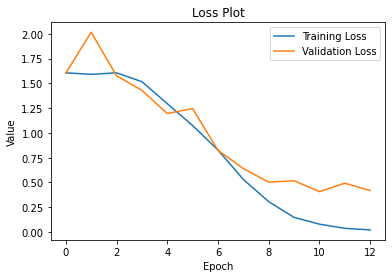

In [9]:
import matplotlib.pyplot as plt

#plot train & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

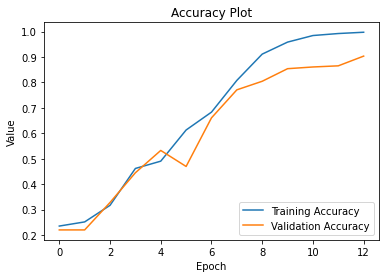

In [10]:
#plot train & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()